### Bike data set 
* Dataset (https://www.kaggle.com/competitions/bike-sharing-demand/data?select=train.csv)
* **Objective** Predict bike rentals based on hourly rental data. We are provided other weather data like temperature and windspeed.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import numpy as np
import xlwings as xw

In [2]:
bike=pd.read_csv('Bike_Data/train.csv')

In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### Exploratory Data Analysis
* First we convert the datetime column to a datetime datatype
* Next we check if any of the columns have null or missing values
* We then check the following relationships.
    * Relationship between month of year and count of rentals
    * Relationship between temperature and count of Rentals 

In [4]:
bike.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
bike['datetime']=pd.to_datetime(bike.datetime)

In [6]:
bike.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [7]:
bike['MonthofYear']=bike.datetime.dt.month

In [8]:
bike.drop(columns=['registered','casual'],inplace=True)

In [11]:
book=xw.Book('Bike_Data/Report_Dashboard.xlsx')

In [13]:
sheet=book.sheets('Exploratory Analysis')

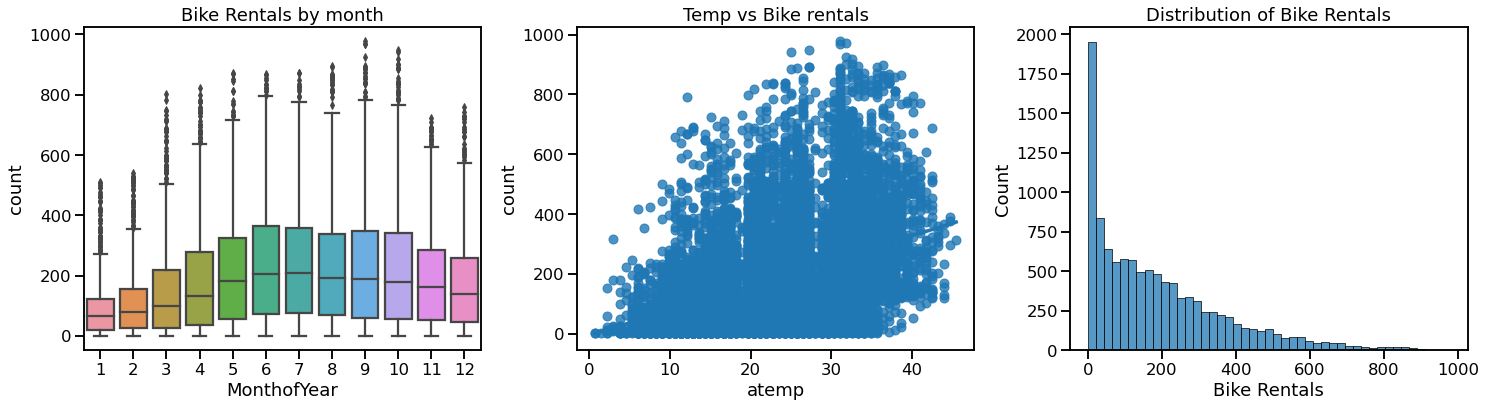

<Picture 'Bike Rentals' in <Sheet [Report_dashboard.xlsx]Exploratory Analysis>>

In [116]:
fig,(ax0,ax1,ax2)=plt.subplots(nrows=1,ncols=3)
fig.set_figheight(6)
fig.set_figwidth(21)
sns.boxplot(x='MonthofYear',y='count',data=bike,ax=ax0)
sns.regplot(x='atemp',y='count',data=bike,ax=ax1)
sns.histplot(x='count',data=bike,ax=ax2)
ax0.set_title('Bike Rentals by month')
ax1.set_title('Temp vs Bike rentals')
ax2.set_xlabel('Bike Rentals')
ax2.set_title('Distribution of Bike Rentals')
plt.tight_layout()
sns.set_context('talk')
#sns.set_theme('dark')
plt.show()
sheet.pictures.add(fig,name='Bike Rentals',update=True)

In [26]:
corr_mat=bike.corr().round(2)
corr_mat

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,MonthofYear
season,1.00,0.03,-0.01,0.01,0.26,0.26,0.19,-0.15,0.16,0.97
holiday,0.03,1.00,-0.25,-0.01,0.00,-0.01,0.00,0.01,-0.01,0.00
workingday,-0.01,-0.25,1.00,0.03,0.03,0.02,-0.01,0.01,0.01,-0.00
weather,0.01,-0.01,0.03,1.00,-0.06,-0.06,0.41,0.01,-0.13,0.01
temp,0.26,0.00,0.03,-0.06,1.00,0.98,-0.06,-0.02,0.39,0.26
atemp,0.26,-0.01,0.02,-0.06,0.98,1.00,-0.04,-0.06,0.39,0.26
humidity,0.19,0.00,-0.01,0.41,-0.06,-0.04,1.00,-0.32,-0.32,0.20
windspeed,-0.15,0.01,0.01,0.01,-0.02,-0.06,-0.32,1.00,0.10,-0.15
count,0.16,-0.01,0.01,-0.13,0.39,0.39,-0.32,0.10,1.00,0.17
MonthofYear,0.97,0.00,-0.00,0.01,0.26,0.26,0.20,-0.15,0.17,1.00


In [27]:
fig,ax=plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(14)
sns.heatmap(corr_mat,annot=True,linewidth=0.3,cmap='viridis')
ax.set_title('Correlation Matrix')
sheet.pictures.add(fig,name='Corr_mat',update=True,left=sheet.range('B37').left,top=sheet.range('B37').top)

<Picture 'Corr_mat' in <Sheet [Report_dashboard.xlsx]Exploratory Analysis>>

In [28]:
X=bike[['atemp','MonthofYear','humidity','weather','holiday']]
y=bike['count']

In [29]:
bike.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [30]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [34]:
max_depths=[3,4,5,6,7,8,9,10,11,12,13,14,15]
for max_depth in max_depths:
    dt=DecisionTreeRegressor(max_depth=max_depth,random_state=20)
    dt.fit(X_train,y_train)
    y_pred=dt.predict(X_test)
    score=r2_score(y_test,y_pred)
    print('The r2_score of tree with max depth {} is'.format(max_depth),score)

The r2_score of tree with max depth 3 is 0.25315593835876327
The r2_score of tree with max depth 4 is 0.2696570407580512
The r2_score of tree with max depth 5 is 0.27991909721751707
The r2_score of tree with max depth 6 is 0.28472509349003394
The r2_score of tree with max depth 7 is 0.29351538161997615
The r2_score of tree with max depth 8 is 0.2889977430574706
The r2_score of tree with max depth 9 is 0.2756986792452071
The r2_score of tree with max depth 10 is 0.25127730794907
The r2_score of tree with max depth 11 is 0.2311209933189422
The r2_score of tree with max depth 12 is 0.18389921965547595
The r2_score of tree with max depth 13 is 0.17020404650838394
The r2_score of tree with max depth 14 is 0.13088162714859009
The r2_score of tree with max depth 15 is 0.10058225825768807


In [92]:
dt=DecisionTreeRegressor(max_depth=4)

In [78]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [79]:
y_pred=dt.predict(X_test)

In [80]:
sheet2=book.sheets('Decision tree')

In [82]:
from sklearn import tree
fig,ax=plt.subplots()
fig.set_figheight(35)
fig.set_figwidth(35)
_=tree.plot_tree(dt,feature_names=X.columns,filled=True)

sheet2.pictures.add(fig,name='Tree',update=True,left=sheet2.range('A6').left,top=sheet2.range('A6').left)

<Picture 'Tree' in <Sheet [Report_dashboard.xlsx]Decision Tree>>

In [124]:
type(fig)

matplotlib.figure.Figure

In [83]:
dt=DecisionTreeRegressor(max_depth=7)

In [84]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7)

In [85]:
y_pred=dt.predict(X_test)

In [91]:
sheet2.range('B2').value=dt.max_depth
sheet2.range('B3').value=r2_score(y_test,y_pred).round(2)

### Now trying Random forest
* We will probably not know the number of registered users ahead of time so drop the columns casual and registered to make this problem interestins
* We can use random forest to get feature importances and use it as a dimensionality reduction technique

In [93]:
#bike.drop(columns=['registered','casual'],inplace=True)

In [94]:
X=bike.drop(columns=['count','datetime'])

In [95]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       10886 non-null  int64  
 1   holiday      10886 non-null  int64  
 2   workingday   10886 non-null  int64  
 3   weather      10886 non-null  int64  
 4   temp         10886 non-null  float64
 5   atemp        10886 non-null  float64
 6   humidity     10886 non-null  int64  
 7   windspeed    10886 non-null  float64
 8   MonthofYear  10886 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 765.5 KB


In [96]:
y=bike['count']

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [98]:
X_train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,MonthofYear
7296,2,0,1,2,19.68,23.485,88,7.0015,5
250,1,0,1,3,6.56,11.365,93,0.0000,1
2219,2,0,1,2,22.14,25.760,88,6.0032,5
7408,2,0,1,2,21.32,25.000,59,15.0013,5
1762,2,0,1,2,20.50,24.240,68,8.9981,4
...,...,...,...,...,...,...,...,...,...
2569,2,0,1,1,22.96,26.515,68,15.0013,6
8801,3,0,1,1,28.70,33.335,84,6.0032,8
3425,3,0,1,1,32.80,34.850,29,11.0014,8
9301,3,0,1,1,22.14,25.760,52,8.9981,9


In [99]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
for max_depth in max_depths:
    rf=RandomForestRegressor(n_estimators=100,max_depth=max_depth,random_state=30)
    rf.fit(X_train,y_train)
    y_pred=rf.predict(X_test)
    score=r2_score(y_test,y_pred)
    print('R2_score with {} max depth is'.format(max_depth),score)

R2_score with 3 max depth is 0.26789302390184444
R2_score with 4 max depth is 0.30653217731535765
R2_score with 5 max depth is 0.336734896380097
R2_score with 6 max depth is 0.36438535004232275
R2_score with 7 max depth is 0.3857627769750207
R2_score with 8 max depth is 0.4000484468065608
R2_score with 9 max depth is 0.41180380060589417
R2_score with 10 max depth is 0.41969677824417295
R2_score with 11 max depth is 0.42077237978019755
R2_score with 12 max depth is 0.418479039922543
R2_score with 13 max depth is 0.41110451320688646
R2_score with 14 max depth is 0.40433539722430467
R2_score with 15 max depth is 0.3980074228563897


In [109]:
rf=RandomForestRegressor(n_estimators=100,max_depth=11,random_state=30)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
score=r2_score(y_test,y_pred)
sheet3=book.sheets('Random forest')
sheet3.range('B4').value=score.round(2)
sheet3.range('B2').value=rf.n_estimators
sheet3.range('B3').value=rf.max_depth

In [162]:
mat=pd.DataFrame(rf.feature_importances_,index=X.columns).sort_values(by=[0])
fig,ax=plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(12)
ax.barh(width=mat[0],y=mat.index)
plt.xticks(rotation=45)
ax.set_title('Feature Importances')
sheet3.pictures.add(fig,name='Feature',update=True,left=sheet3.range('A8').left,top=sheet3.range('A8').left)

<Picture 'Feature' in <Sheet [Report_dashboard.xlsx]Random Forest>>

In [123]:
type(mat)

matplotlib.axes._subplots.AxesSubplot